# This Notebook characterizes the reference dataset and combines different files to create a reference

In [10]:
import scanpy as sc
import anndata as ad
import gc
from singlecellexperiment import SingleCellExperiment
import matplotlib.pyplot as plt


In [ ]:
# File sizes in gigabytes
file_sizes_gb = {
    "glioblast_hbdatlas.h5ad": 28.94,
    "Oligo.h5ad": 1.37,
    "radial_glia_1.h5ad": 14.57,
    "radial_glia_2.h5ad": 44.35,
    "radial_glia_3.h5ad": 11.09,
    "radial_glia_4.h5ad": 45.28,
}

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(file_sizes_gb.keys(), file_sizes_gb.values(), color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.xlabel('Files')
plt.ylabel('Size (GB)')
plt.title('File Sizes in Gigabytes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

## This part combines different datasets from reference to create reference and validation set 

In [2]:
# Function to sample 10,000 cells from each CellClass
def sample_cells(adata, n_samples=10000, n_samples_val=500):
    sampled_indices = adata.obs.index.to_series().sample(n_samples)
    sampled_indices_validation = adata.obs.index.to_series().sample(n_samples_val)
    # Return the subset of the adata object corresponding to the sampled indices
    return adata[sampled_indices], adata[sampled_indices_validation]

# Sample cells
def read_and_concat(existing_combined, n_samples, n_samples_val,  file_path):
    adata = ad.read_h5ad(file_path)
    adata.var_names_make_unique()
    adata, adata_val = sample_cells(adata, n_samples, n_samples_val)
    combined = ad.concat([existing_combined, adata], join='outer', axis=0)
    del adata
    gc.collect()  # Explicitly free up memory
    return combined, adata_val

# Load the initial datasets
print("Reading Glio")
glioblast = ad.read_h5ad("/lustre/scratch126/gengen/teams/parts/mr35/Developing_Human_Brain/full_ref/glioblast_hbdatlas.h5ad")
glioblast.var_names_make_unique()
glioblast, glioblast_val = sample_cells(glioblast, 5000, 1000)
print("Reading oligo")
oligo = ad.read_h5ad("/lustre/scratch126/gengen/teams/parts/mr35/Developing_Human_Brain/full_ref/Oligo.h5ad")
oligo.var_names_make_unique()
oligo, oligo_val = sample_cells(oligo, 5000, 1000)

# Combine the first two datasets
print("Combining Glio and Oligo")
combined = ad.concat([glioblast, oligo], join='outer', axis=0)
del glioblast
del oligo
gc.collect()  # Explicitly free up memory

# Read and combine additional datasets one by one
print("Reading and combining radial glia 1")
combined, radial_glia_val1 = read_and_concat(combined, 1250, 250, "/lustre/scratch126/gengen/teams/parts/mr35/Developing_Human_Brain/full_ref/radial_glia_1.h5ad")

print("Reading and combining radial glia 2")
combined, radial_glia_val2 = read_and_concat(combined, 1250, 250, "/lustre/scratch126/gengen/teams/parts/mr35/Developing_Human_Brain/full_ref/radial_glia_2.h5ad")

print("Reading and combining radial glia 3")
combined, radial_glia_val3 = read_and_concat(combined, 1250, 250, "/lustre/scratch126/gengen/teams/parts/mr35/Developing_Human_Brain/full_ref/radial_glia_3.h5ad")

print("Reading and combining radial glia 4")
combined, radial_glia_val4 = read_and_concat(combined, 1250, 250, "/lustre/scratch126/gengen/teams/parts/mr35/Developing_Human_Brain/full_ref/radial_glia_4.h5ad")

# At this point, combined contains all datasets
print("Combination complete")


Reading Glio


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/software/isg/languages/Python-3.9.10/lib/python3.9/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


Reading oligo


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Combining Glio and Oligo
Reading and combining radial glia 1


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading and combining radial glia 2


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading and combining radial glia 3


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading and combining radial glia 4


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Combination complete


'\n# 1. Downsample - randomly - balancing\n# 2. DGE 10K cells DGE on Reference of unique per cell type concatenate [600 per cell type p value and log fc]\n# 2.5 Send list and distribution of markers (vulcano plot)\n# 3. CellTypist with canonical / DGE / canonical + DGE / other list as canonical (someting different)\n# 3.5 SingleR same test\n# 4. Read about singleR / CellTypist Calling \n'

### Save combined reference in cluster

In [3]:
combined.write_h5ad(
    "/lustre/scratch126/gengen/teams/parts/mr35/Developing_Human_Brain/full_ref/combined_ref.h5ad"
)

/software/isg/languages/Python-3.9.10/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'CellClass' as categorical
/software/isg/languages/Python-3.9.10/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Subregion' as categorical
/software/isg/languages/Python-3.9.10/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will 

In [4]:
combined.obs['CellClass']

10X185_7:TGGTTAGCACAGAGCA      Glioblast
10X252_7:ACATGCAGTCCAGGTC      Glioblast
10X255_7:CTGTGGGGTTATAGCC      Glioblast
10X112_1:GATCGCGAGCGTGAAC      Glioblast
10X104_1:CCGGTAGGTCATCGGC      Glioblast
                                ...     
10X126_4:GCGCCAAGTAGCCTCG    Radial glia
10X197_1:TCAAGCAGTCTTGAAC    Radial glia
10X298_3:GACGTTAGTTCAGTAC    Radial glia
10X198_2:ATCACGATCCGCAAAT    Radial glia
10X288_3:CCATCACAGGTCATCT    Radial glia
Name: CellClass, Length: 15000, dtype: category
Categories (3, object): ['Glioblast', 'Oligo', 'Radial glia']

## Build Validation Set

In [5]:
combined_val_set = ad.concat([glioblast_val, oligo_val], join='outer', axis=0)

combined_val_set = ad.concat([combined_val_set, radial_glia_val1], join='outer', axis=0)
combined_val_set = ad.concat([combined_val_set, radial_glia_val2], join='outer', axis=0)
combined_val_set = ad.concat([combined_val_set, radial_glia_val3], join='outer', axis=0)
combined_val_set = ad.concat([combined_val_set, radial_glia_val4], join='outer', axis=0)


In [6]:
combined_val_set.write_h5ad(
    "/lustre/scratch126/gengen/teams/parts/mr35/Developing_Human_Brain/full_ref/combined_ref_val.h5ad"
)

/software/isg/languages/Python-3.9.10/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'CellClass' as categorical
/software/isg/languages/Python-3.9.10/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Subregion' as categorical
/software/isg/languages/Python-3.9.10/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will 

## Characterization of Train and Validation Set

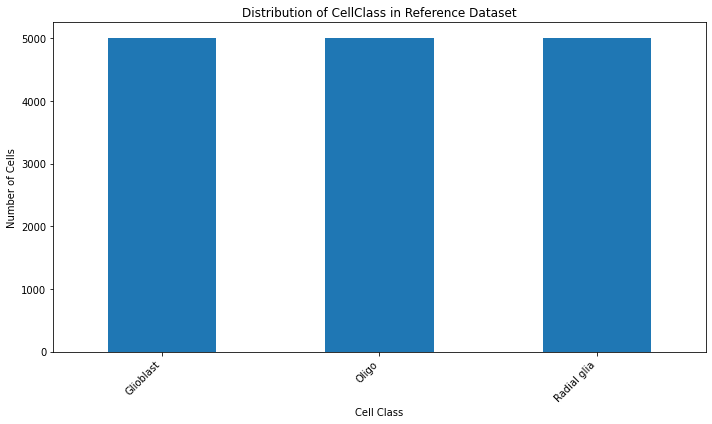

In [8]:
# Plot the distribution of the 'CellClass' variable
plt.figure(figsize=(10, 6))
combined.obs['CellClass'].value_counts().plot(kind='bar')
plt.xlabel('Cell Class')
plt.ylabel('Number of Cells')
plt.title('Distribution of CellClass in Reference Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot to a file
plt.savefig('results/cell_class_distribution.png')

# Show the plot
plt.show()

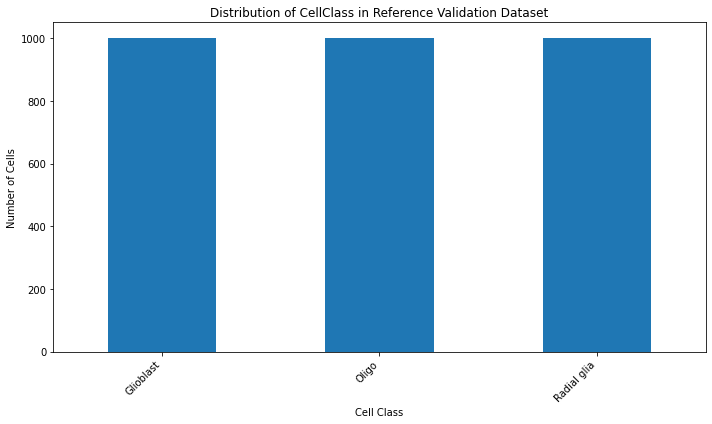

In [9]:
# Plot the distribution of the 'CellClass' variable
plt.figure(figsize=(10, 6))
combined_val_set.obs['CellClass'].value_counts().plot(kind='bar')
plt.xlabel('Cell Class')
plt.ylabel('Number of Cells')
plt.title('Distribution of CellClass in Reference Validation Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot to a file
plt.savefig('results/cell_class_val_distribution.png')

# Show the plot
plt.show()